# Visualise results of pretraining on B97-D3 / QM9 before finetuning on wB97X-D3

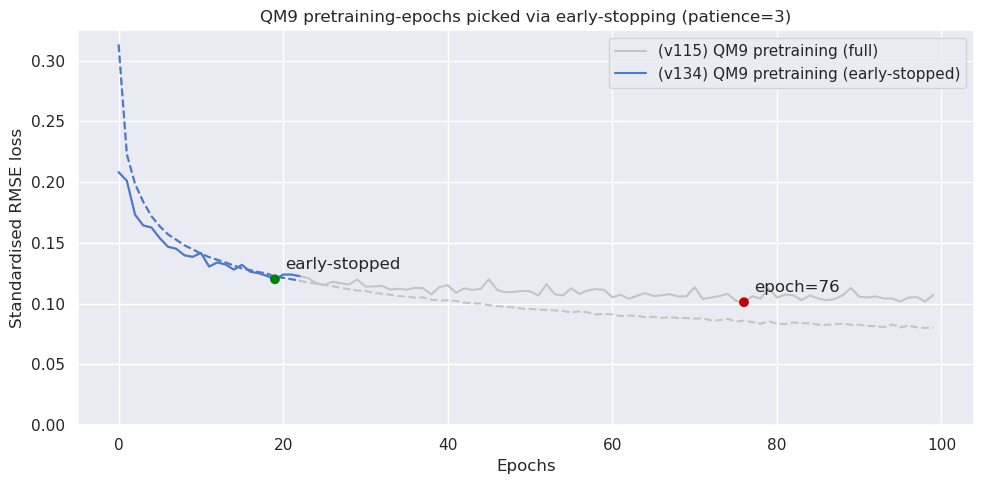

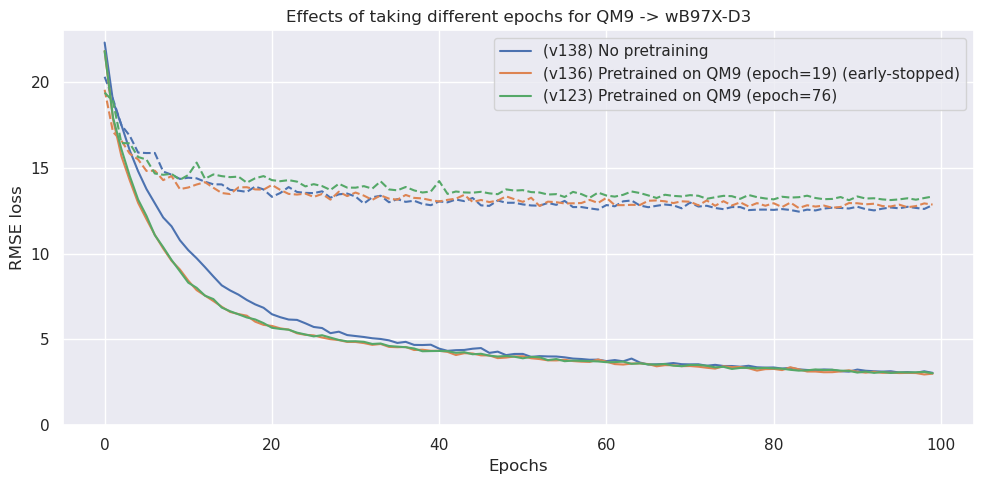

Conclusion: Pretraining on QM9 for longer causes slightly worse validation loss.


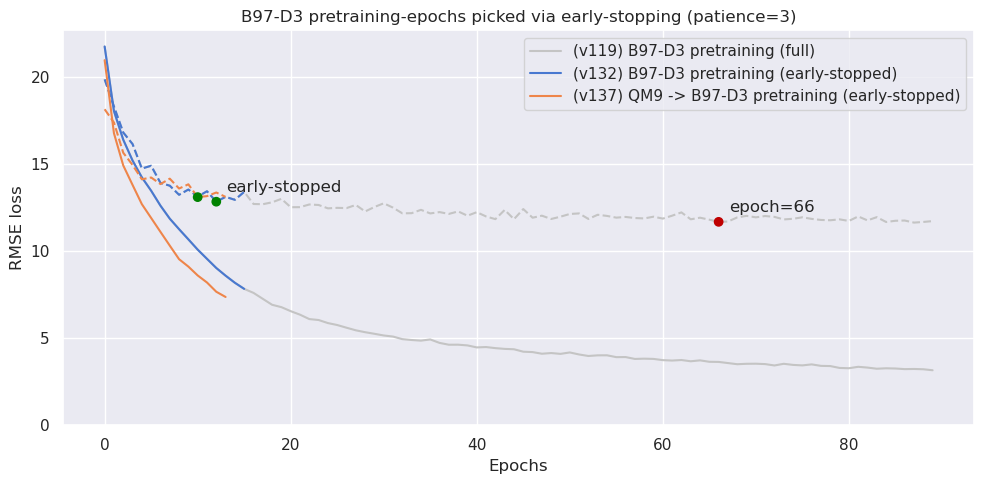

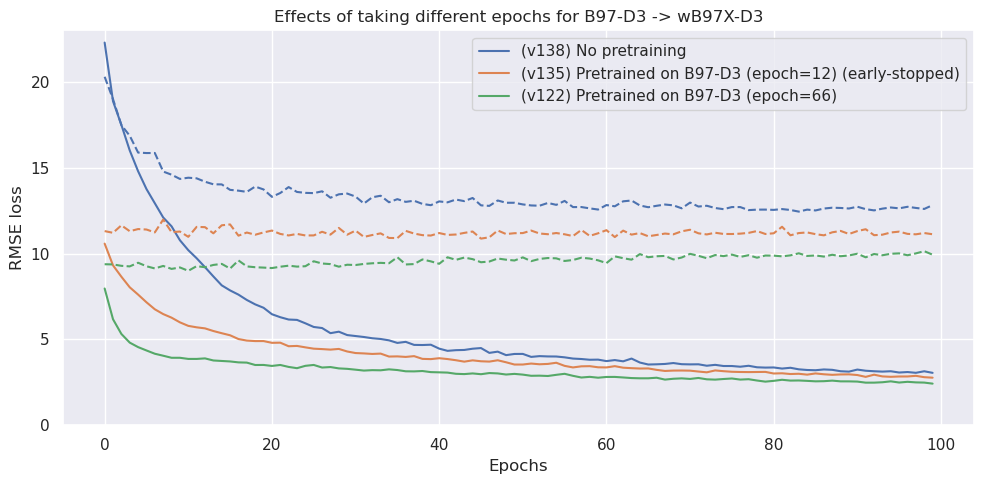

Conclusion: Pretraining on B97-D3 for longer causes much better validation loss.


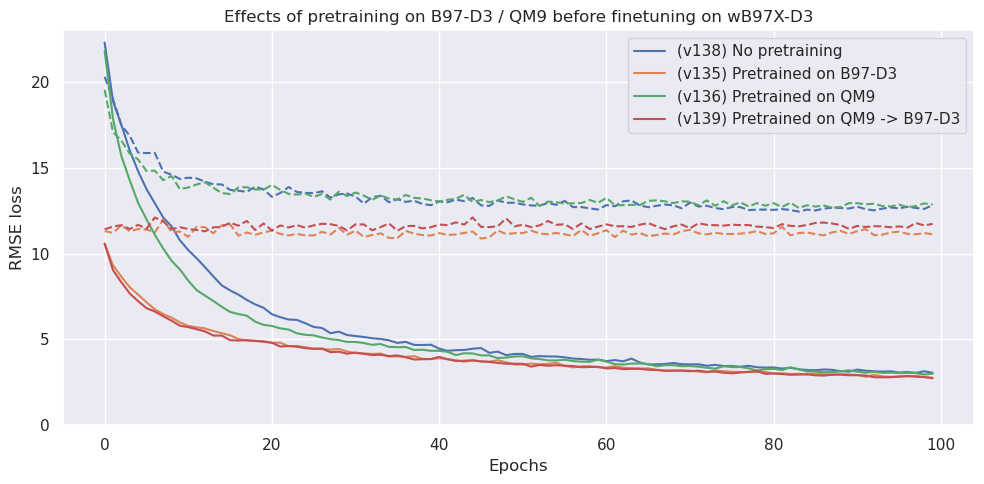

Conclusion: Pretraining on QM9 doesn't seem to improve performance.


In [3]:
import seaborn as sns
from utils import plot_losses, load_version_log
import numpy as np

sns.set_theme()

MUTED_COLORS: list[tuple[int, int, int]] = sns.color_palette('muted') # type: ignore
LIGHT_GRAY = "#c4c4c4"
RED = "#bf0000"
GREEN = "#008200"



hparams, metrics = load_version_log(134)
val_losses = metrics['std_val_loss'].dropna()
best_point: tuple[int, float] = \
    (val_losses.values.argmin(), val_losses.min()) # type: ignore

hparams, metrics = load_version_log(115)
val_losses = metrics['std_val_loss'].dropna()
epoch_76: tuple[int, float] = (76, val_losses.iloc[76])

plot_losses(
    plot_title = "QM9 pretraining-epochs picked via early-stopping (patience=3)",
    version_nums = [115, 134],
    titles = [
        "(v{version_num}) QM9 pretraining (full)",
        "(v{version_num}) QM9 pretraining (early-stopped)",
    ],
    epoch_range = (0, 100),
    y_lim = (0, None),
    metric_col_names=["std_val_loss", "train_raw_std_mse_loss"],
    metric_map = [None, lambda lst: np.sqrt(np.array(lst)).tolist() ],
    x_y_labels = ("Epochs", "Standardised RMSE loss"),
    colors = [LIGHT_GRAY, MUTED_COLORS[0], MUTED_COLORS[1]],
    points = [best_point, epoch_76],
    point_colors = [GREEN, RED],
    point_annotations = ["early-stopped", "epoch=76"],
)
plot_losses(
    plot_title = "Effects of taking different epochs for QM9 -> wB97X-D3",
    version_nums = [138, 136, 123],
    titles = [
        "(v{version_num}) No pretraining", 
        "(v{version_num}) Pretrained on QM9 (epoch=19) (early-stopped)",
        "(v{version_num}) Pretrained on QM9 (epoch=76)", 
    ],
    y_lim = (0, 23),
    x_y_labels = ("Epochs", "RMSE loss"),
)
print("Conclusion: Pretraining on QM9 for longer causes slightly worse validation loss.")



points: list[tuple[float, float]] = []
hparams, metrics = load_version_log(132)
val_losses = metrics['val_loss'].dropna()
best_point_132: tuple[int, float] = \
    (val_losses.values.argmin(), val_losses.min()) # type: ignore

hparams, metrics = load_version_log(137)
val_losses = metrics['val_loss'].dropna()
best_point_137: tuple[int, float] = \
    (val_losses.values.argmin(), val_losses.min()) # type: ignore

hparams, metrics = load_version_log(119)
val_losses = metrics['val_loss'].dropna()
epoch_66: tuple[int, float] = (66, val_losses.iloc[66])
plot_losses(
    plot_title = "B97-D3 pretraining-epochs picked via early-stopping (patience=3)",
    version_nums = [119, 132, 137],
    titles = [
        "(v{version_num}) B97-D3 pretraining (full)",
        "(v{version_num}) B97-D3 pretraining (early-stopped)",
        "(v{version_num}) QM9 -> B97-D3 pretraining (early-stopped)",
    ],
    y_lim = (0, None),
    x_y_labels = ("Epochs", "RMSE loss"),
    colors = [LIGHT_GRAY, MUTED_COLORS[0], MUTED_COLORS[1]],
    points = [best_point_132, best_point_137, epoch_66],
    point_colors = [GREEN, GREEN, RED],
    point_annotations = ["early-stopped", "", "epoch=66"],
)

plot_losses(
    plot_title = "Effects of taking different epochs for B97-D3 -> wB97X-D3",
    version_nums = [138, 135, 122],
    titles = [
        "(v{version_num}) No pretraining",  
        "(v{version_num}) Pretrained on B97-D3 (epoch=12) (early-stopped)",
        "(v{version_num}) Pretrained on B97-D3 (epoch=66)",
    ],
    epoch_range = (0, 100),
    y_lim = (0, 23),
    x_y_labels = ("Epochs", "RMSE loss"),
)
print("Conclusion: Pretraining on B97-D3 for longer causes much better validation loss.")



plot_losses(
    plot_title = "Effects of pretraining on B97-D3 / QM9 before finetuning on wB97X-D3",
    version_nums = [138, 135, 136, 139], # 110 is old "no pretraining", 138 is new
    titles = [
        "(v{version_num}) No pretraining", 
        "(v{version_num}) Pretrained on B97-D3", 
        "(v{version_num}) Pretrained on QM9",
        "(v{version_num}) Pretrained on QM9 -> B97-D3",
    ],
    epoch_range = (0, 100),
    y_lim = (0, 23),
    x_y_labels = ("Epochs", "RMSE loss"),
)
print("Conclusion: Pretraining on QM9 doesn't seem to improve performance.")

# Visualise results of varying dropout

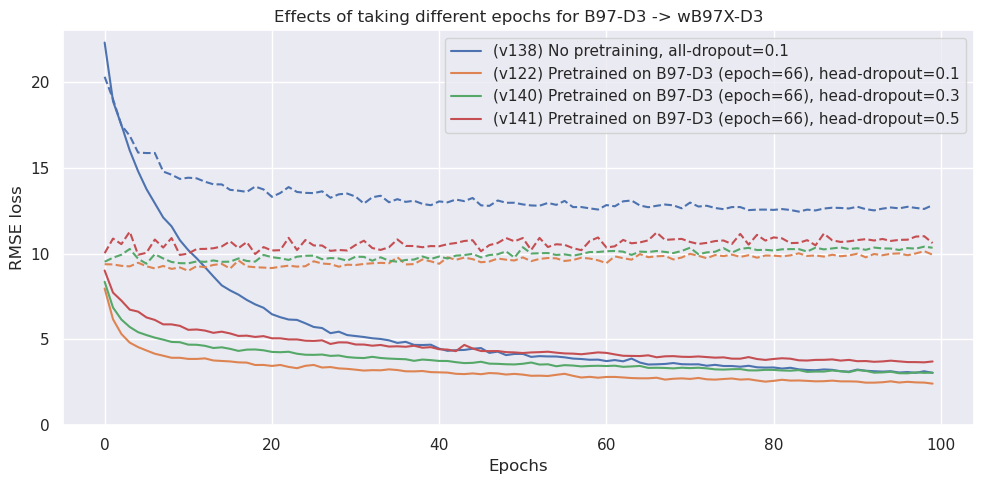

In [1]:
import seaborn as sns
from utils import plot_losses, load_version_log
import numpy as np

sns.set_theme()

MUTED_COLORS: list[tuple[int, int, int]] = sns.color_palette('muted') # type: ignore
LIGHT_GRAY = "#c4c4c4"
RED = "#bf0000"
GREEN = "#008200"


plot_losses(
    plot_title = "Effects of taking different epochs for B97-D3 -> wB97X-D3",
    version_nums = [138, 122, 140, 141],
    titles = [
        "(v{version_num}) No pretraining, all-dropout={dropout_rate}",  
        "(v{version_num}) Pretrained on B97-D3 (epoch=66), head-dropout={dropout_rate}",
        "(v{version_num}) Pretrained on B97-D3 (epoch=66), head-dropout={dropout_rate}",
        "(v{version_num}) Pretrained on B97-D3 (epoch=66), head-dropout={dropout_rate}",
    ],
    epoch_range = (0, 100),
    y_lim = (0, 23),
    x_y_labels = ("Epochs", "RMSE loss"),
)